In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections

In [2]:
reviews = pd.read_csv('../csvs/cleaned.csv', index_col = 0)

In [3]:
df = reviews.copy()

In [4]:
pd.DataFrame({'null count':df.isnull().sum(), 'total':df.count()})

,null count,total
company,0,6445
title,5,6440
name,0,6445
position,731,5714
industry,2393,4052
usage,2735,3710
paid_status,300,6145
source,64,6381
date,0,6445
total,0,6445


In [9]:
df['source'].value_counts()

Capterra           5644
Software Advice     650
GetApp               87
Name: source, dtype: int64

In [10]:
# tipsGrid = sns.FacetGrid(df, row='date', col='overall', hue='company', palette="Set2")
# tipsGrid.map(sns.regplot,'date','overall')
# tipsGrid.add_legend()

In [11]:
df.head()

,company,title,name,position,industry,usage,paid_status,source,date,total,...,feature,support,value,recommend,comments,pros,cons,overall,recommendations to other buyers,employees
0,tix,Tix Cares! *Best ticketing Company...Bar none.,Beatriz B.,Marketing Coordinator,Gambling & Casinos,2+ years,NO,Capterra,2019-02-20,5,...,5.0,5.0,5.0,10.0,NaN,Customer service is the BEST! No words can des...,Not many people know about Tix. If more people...,"I had no background on ticketing systems, Tix ...",NaN,1001-5000
1,tix,"Couldn't be more pleased with Tix, Inc.'s web ...",Carleton U.,Treasurer,NaN,NaN,NO,Capterra,2016-04-04,5,...,5.0,5.0,5.0,10.0,After much research into the various vendors f...,NaN,NaN,NaN,NaN,NaN
2,tix,TIX is the answer we needed--Great support and...,Jennifer E.,Data Systems Coordinator,Religious Institutions,Less than 6 months,NO,Capterra,2016-10-13,5,...,5.0,5.0,5.0,10.0,NaN,Patron experience is excellent. Help library i...,Sometimes the reports do not output to excel c...,We wanted an easy-to-use system where patrons ...,NaN,51-200
3,tix,The Excellent Customer Service has made workin...,Rita A.,Box Office Manager,NaN,NaN,NO,Capterra,2016-05-04,4,...,5.0,5.0,5.0,10.0,I have worked with these people and this syste...,NaN,NaN,NaN,NaN,NaN
4,tix,Great ticket company and excellent customer se...,Alan G.,Box Office Manager,NaN,NaN,NO,Capterra,2016-04-22,5,...,5.0,5.0,5.0,10.0,PROS-\n\n-24/7 support and customer service\n\...,NaN,NaN,NaN,NaN,NaN


In [15]:
a = df.company.value_counts()
a[a > 100]

11

Text(0.5, 1.0, 'Median Overall Rating for Each Company')

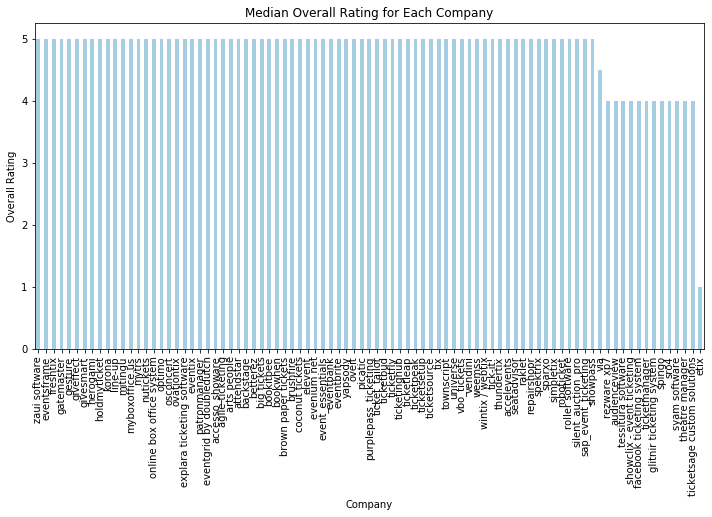

In [181]:
plt.figure(figsize=(12,6))
df.groupby('company')['total'].median().sort_values(ascending=False).plot.bar(colormap='Paired')
plt.xlabel('Company')
plt.ylabel('Overall Rating')
plt.title('Median Overall Rating for Each Company')

In [5]:
df_100 = df.groupby('company').filter(lambda x: x.company.value_counts() > 100)

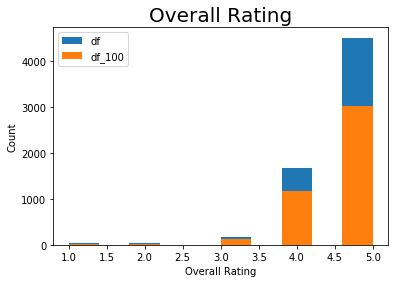

In [26]:
plt.hist(df['total'])
plt.hist(df_100['total'])
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.title('Overall Rating', fontsize=20)
plt.gca().legend(('df','df_100'))

Text(0.5, 1.0, 'Recommendation Levels for Companies with over 100 Reviews')

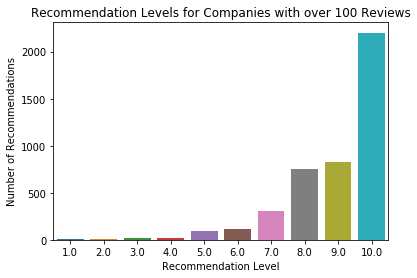

In [23]:
sns.countplot(df_100['recommend'])
plt.xlabel('Recommendation Level')
plt.ylabel('Number of Recommendations')
plt.title('Recommendation Levels for Companies with over 100 Reviews')

Text(0.5, 1.0, 'Recommendation Levels for Companies')

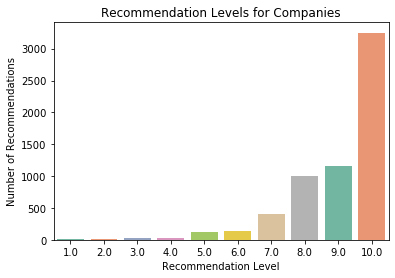

In [8]:
sns.countplot(df['recommend'], palette = "Set2")
plt.xlabel('Recommendation Level')
plt.ylabel('Number of Recommendations')
plt.title('Recommendation Levels for Companies')

Text(0.5, 1.0, 'Paid Status for Companies with over 100 Reviews')

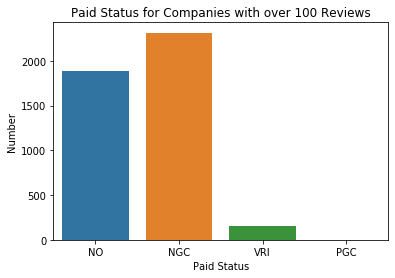

In [25]:
sns.countplot(df_100['paid_status'])
plt.xlabel('Paid Status')
plt.ylabel('Number')
plt.title('Paid Status for Companies with over 100 Reviews')

In [14]:
df_100.groupby('paid_status').agg({'total':'mean', 'recommend':'mean'})

,total,recommend
paid_status,,
NGC,4.598272,8.784881
NO,4.683457,9.073701
PGC,4.000000,6.500000
VRI,4.887417,9.569536


In [13]:
df_100['paid_status'].value_counts()

NGC    2315
NO     1886
VRI     151
PGC       2
Name: paid_status, dtype: int64

In [7]:
# plt.figure(figsize=(12,6))
# df_eventbrite = df.loc[df['company'] == 'eventbrite']

# df_eventbrite.dropna(subset=['total']).groupby('date').total.mean().plot()
# plt.xlabel('Date')
# plt.ylabel('Overall Rating')
# plt.title('Overall Rating Time Series - Eventbrite')


In [6]:
# plt.figure(figsize=(12,6))
# df_eventix = df.loc[df['company'] == 'eventix']

# df_eventix.dropna(subset=['total']).groupby('date').total.mean().plot()
# plt.xlabel('Date')
# plt.ylabel('Overall Rating')
# plt.title('Overall Rating Time Series - Eventix')